In [2]:
import librosa
import librosa.feature
import librosa.display
import matplotlib.pyplot as plt

In [3]:
file_path = "song for testing.mp3"
y, sr = librosa.load(file_path)

### Beat Tracking

In [4]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

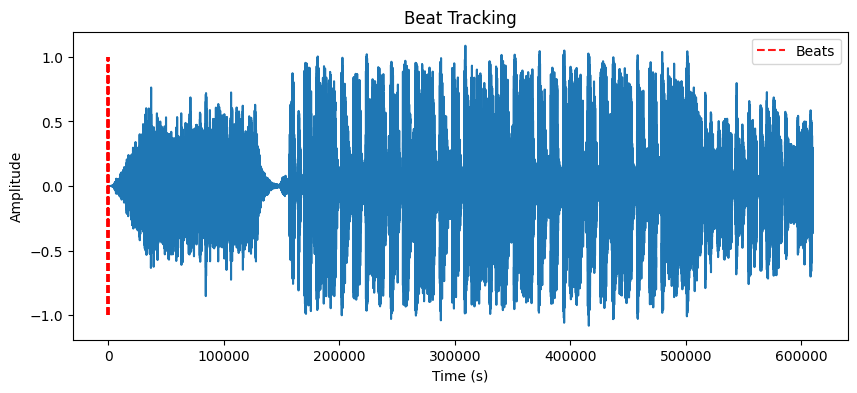

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.vlines(librosa.frames_to_time(beat_frames), -1, 1, color= 'r', alpha=0.9, linestyles='--', label='Beats')
plt.title('Beat Tracking')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Spectogram

In [8]:
import numpy as np

In [10]:
# Short-Time Fourier Transform
D = np.abs(librosa.stft(y))
S = librosa.amplitude_to_db(D, ref=np.max)

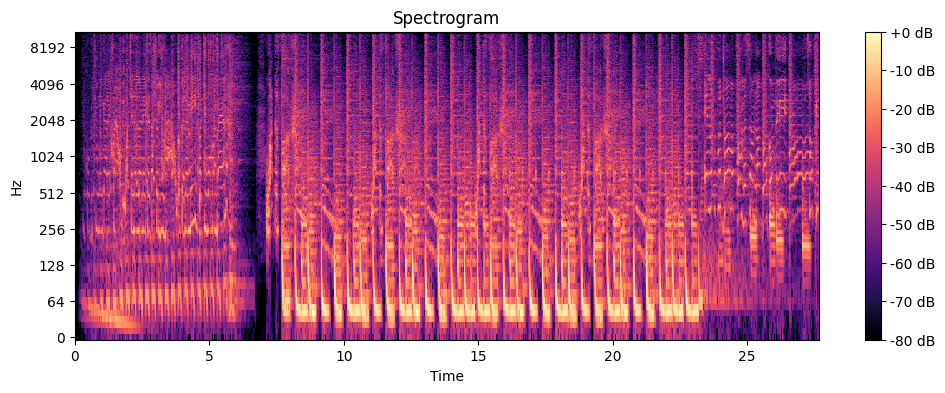

In [11]:
# Display the spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

### Chromagram

In [12]:
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

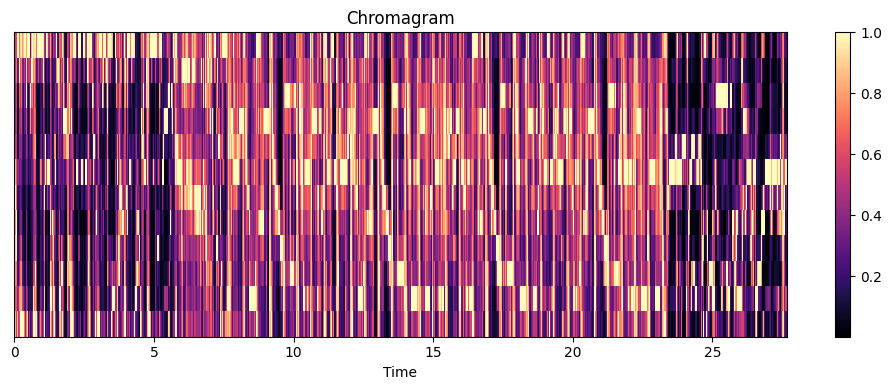

In [13]:
# Display the chromagram
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

### Tempo Estimation

In [14]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

In [16]:
# If tempo is an array (due to multiple tempo estimates), you can print each estimate separately
if isinstance(tempo, np.ndarray):
    print("Estimated Tempos:")
    for t in tempo:
        print(f"{t:.2f} BPM")
else:
    print(f'Estimated Tempo: {tempo:.2f} BPM')

Estimated Tempos:
123.05 BPM


### Tempo and Beat Tracking Visualization

In [18]:
# Detect onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
# Convert frames to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

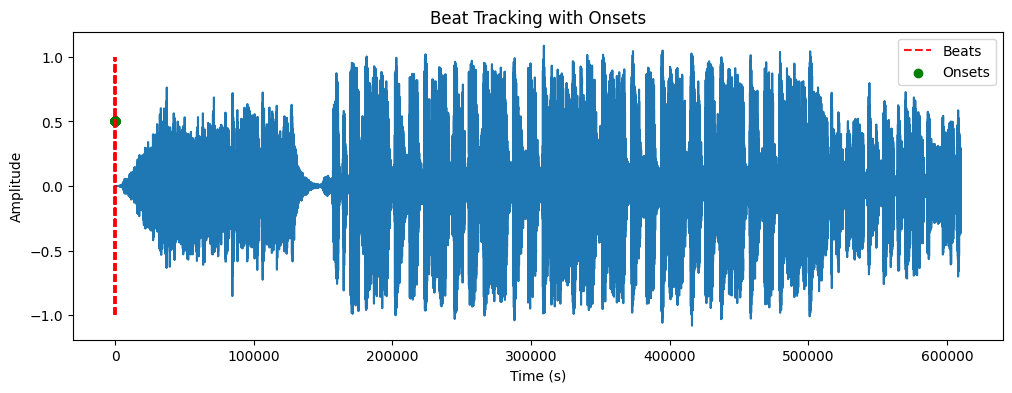

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(y)
plt.vlines(librosa.frames_to_time(beat_frames), -1, 1, color='r', alpha=0.9, linestyle='--', label='Beats')
plt.scatter(onset_times, [0.5] * len(onset_times), color='g', marker='o', label='Onsets')
plt.title('Beat Tracking with Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Harmonic-Percussive Source Separation

In [20]:
harmonic, percussive = librosa.effects.hpss(y)

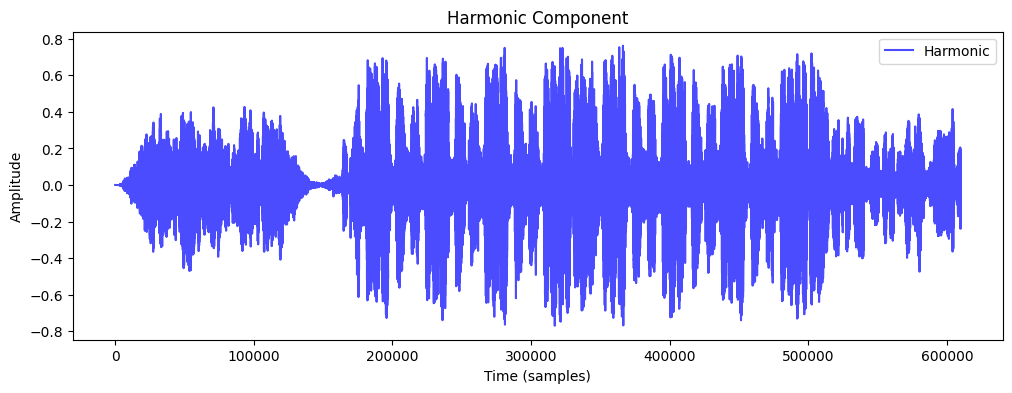

In [21]:
# Plot harmonic component Pitch and melodies and chords
plt.figure(figsize=(12, 4))
plt.plot(harmonic, color='b', alpha=0.7, label='Harmonic')
plt.title('Harmonic Component')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

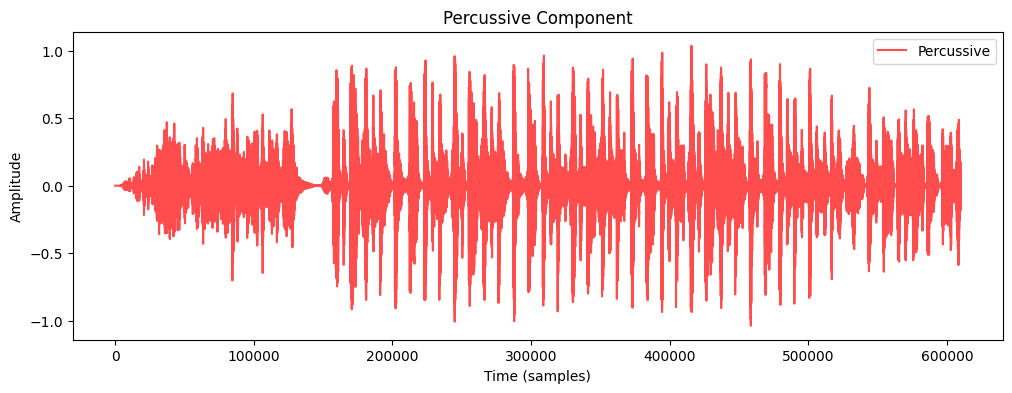

In [22]:
# Plot percussive component non-pitched or transient components
plt.figure(figsize=(12, 4))
plt.plot(percussive, color='r', alpha=0.7, label='Percussive')
plt.title('Percussive Component')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()